# this is work for churn prediction of customer of a Bank

In [84]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# loading the data of bank
df = pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [86]:
## cheking the shape
df.shape

(28382, 21)

# cheking null, unique and dtypes of the features

In [87]:
# storing in a dataframe (temp)
temp = pd.DataFrame(index = df.columns)
temp['null_values'] = df.isnull().sum()
temp['unique_values'] = df.nunique()
temp['datatype'] = df.dtypes

In [88]:
# cheking the summary in temp
temp

,null_values,unique_values,datatype
customer_id,0,28382,int64
vintage,0,5473,int64
age,0,90,int64
gender,525,2,object
dependents,2463,15,float64
occupation,80,5,object
city,803,1604,float64
customer_nw_category,0,3,int64
branch_code,0,3185,int64
days_since_last_transaction,3223,360,float64


We have tree columns with null values
1. Gender = 525
2. Dependents  = 2463
3. Occupation  = 80
4. city        = 803
5. days_since_last_transaction = 3223

# imputing missing values in Gender

In [89]:
# checking the counts in Gender
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [90]:
# filling with the mode of Gender 
df['gender'].fillna(value='Male', inplace =True)

# imputing missing value in Dependents

In [91]:
# checking the counts in Dependents
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [92]:
# filling with the mode of Gender 
df['dependents'].fillna(value=0.0, inplace =True)

# imputing missing value in occupation	 

In [93]:
# checking the counts in Dependents
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [94]:
# filling with the mode of Gender 
df['occupation'].fillna(value='self_employed', inplace =True)

# imputing missing value in city

In [95]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [96]:
# filling with the mode of Gender 
df['city'].fillna(value=1020.0, inplace =True)

# imputing missing value in days_since_last_transaction

In [97]:
df['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [98]:
df['days_since_last_transaction'].fillna(value=0.0, inplace =True)

# checking the null value after imputation


In [99]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# univarate analysis

In [100]:
# lets first divide the task into histogram and bar graph

hist_list = [
        'vintage', 'age', 
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'
]
bar_list = ['gender', 'dependents', 'customer_nw_category','occupation','churn']

# histogram check for continous varaibles

In [164]:
def plot_hist(x):
    print('---------'+x+'------------')
    df[x].plot.hist(bins=50)
    plt.xlabel(x, fontsize=12)

---------vintage------------


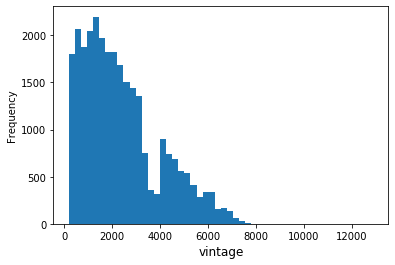

In [165]:
plot_hist('vintage')

vintage is right skewed with mostly Rupees < 4000

In [103]:
length = (len(df))
length

28382

vintage is 

---------age------------


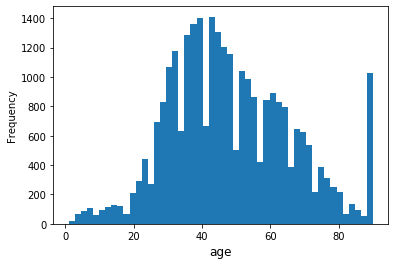

In [167]:
plot_hist('age')

mostly people are of age 25 - 60
but I think we have oulier in this as it is showing a huge number of people of age about 88.

---------days_since_last_transaction------------


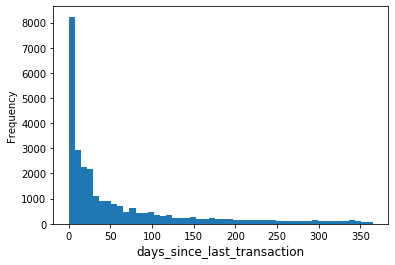

In [166]:
plot_hist(hist_list[2])

around 8000+ people had last transaction 0 day before. 
this is a right skewed histogram

---------current_balance------------


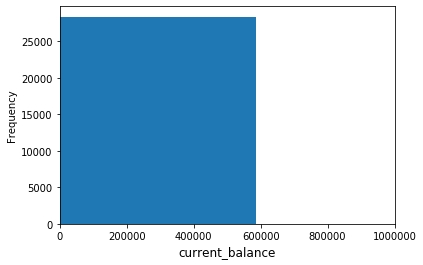

In [106]:
plot_hist(hist_list[3])

all people have current balance below than 600,000

---------previous_month_end_balance------------


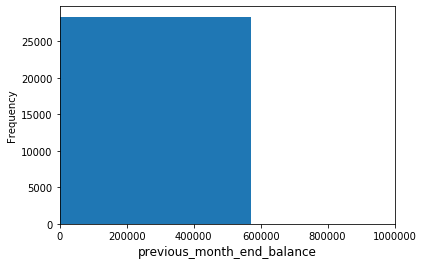

In [107]:
plot_hist(hist_list[4])

---------average_monthly_balance_prevQ------------


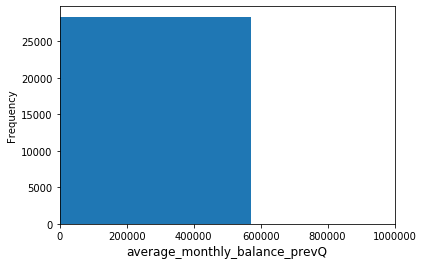

In [108]:
plot_hist(hist_list[5])

---------average_monthly_balance_prevQ2------------


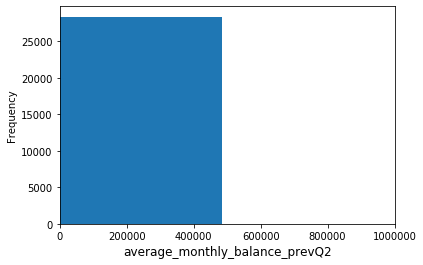

In [109]:
plot_hist(hist_list[6])

---------current_month_credit------------


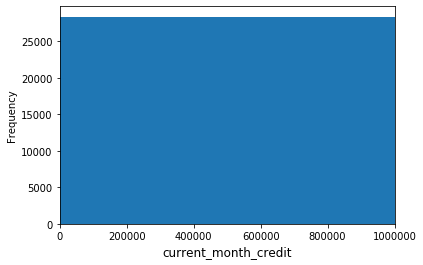

In [110]:
plot_hist(hist_list[7])

---------previous_month_credit------------


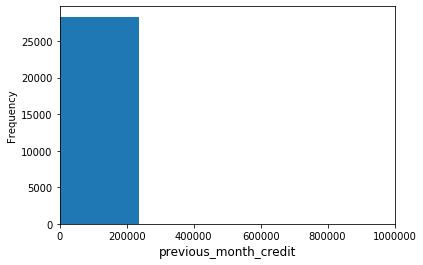

In [111]:
plot_hist(hist_list[8])

---------current_month_debit------------


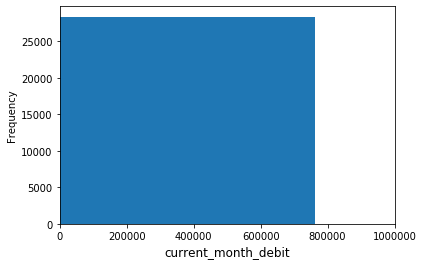

In [112]:
plot_hist(hist_list[9])

---------previous_month_debit------------


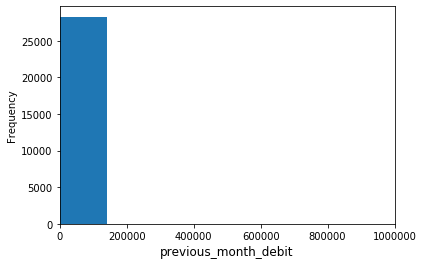

In [113]:
plot_hist(hist_list[10])

---------current_month_balance------------


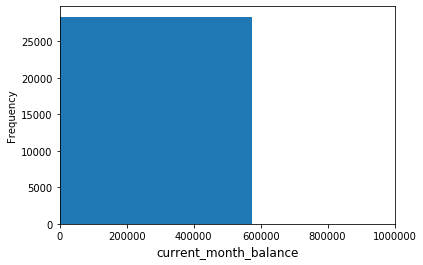

In [114]:
plot_hist(hist_list[11])

---------previous_month_balance------------


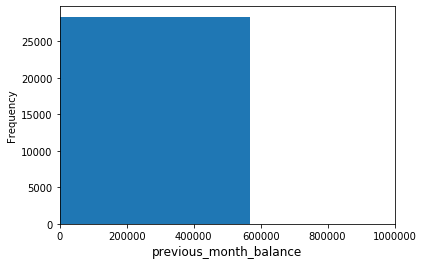

In [115]:
plot_hist(hist_list[12])

all people have balance of previous month is less than 1000,000

# Bar graph check for grouped frequency

Text(0.5, 0, 'gender')

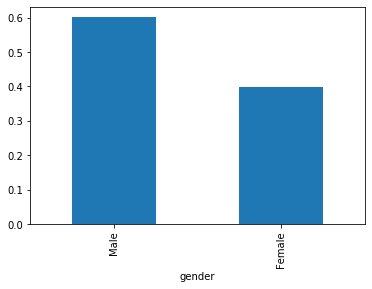

In [116]:
(df[bar_list[0]].value_counts()/length).plot(kind='bar')
plt.xlabel(bar_list[0])

male: femal  = .6: .4

Text(0.5, 0, 'dependents')

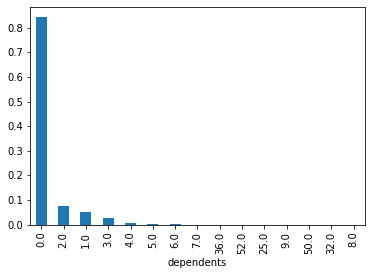

In [117]:
(df[bar_list[1]].value_counts()/length).plot(kind='bar')
plt.xlabel(bar_list[1])

more than 80% peple are independent

Text(0.5, 0, 'customer_nw_category')

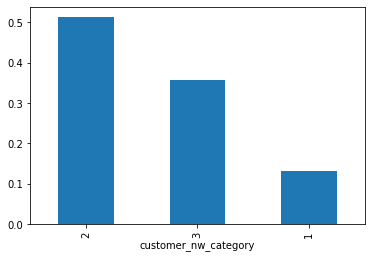

In [118]:
(df[bar_list[2]].value_counts()/length).plot(kind='bar')
plt.xlabel(bar_list[2])

about 50% people have medium income 
15% people have low income

Text(0.5, 0, 'occupation')

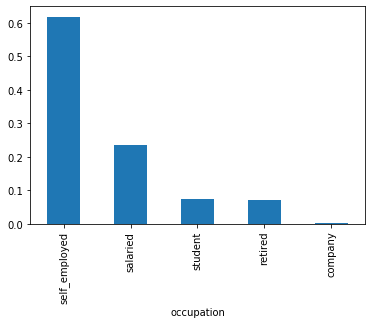

In [119]:
(df[bar_list[3]].value_counts()/length).plot(kind='bar')
plt.xlabel(bar_list[3])

about 60% people are self-employed

Text(0.5, 0, 'churn')

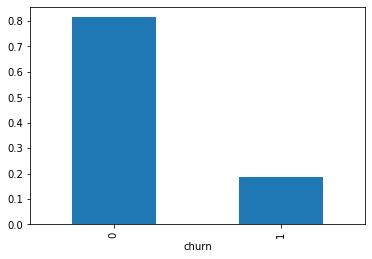

In [120]:
(df[bar_list[4]].value_counts()/length).plot(kind='bar')
plt.xlabel(bar_list[4])

about 80% customer have churn value 0

# Feature engiring on the basis of following
1. change in the debit of two months
2. change in the credit of two months
3. change in the amount of two months
4. change in the total amount of two months

In [121]:
df['debit_change'] = df['current_month_debit']-df['previous_month_debit']
df['credit_change'] = df['current_month_credit']-df['previous_month_credit']
df['total_amount_change'] = df['current_balance'] -df['previous_month_end_balance']
df['change_in_quarter_balance']= df['average_monthly_balance_prevQ']-df['average_monthly_balance_prevQ2']

In [122]:
df.shape

(28382, 25)

In [123]:
df.drop(['customer_id'], axis=1, inplace=True)
df.shape

(28382, 24)

In [124]:
data = pd.get_dummies(df)
data.shape

(28382, 29)

# dependent and independent

In [125]:
x = data.drop(['churn'] , axis=1)
y = data['churn']

# spliting data into train and test

In [126]:
from sklearn.model_selection import train_test_split as ttt

In [127]:
train_x, test_x, train_y, test_y = ttt(x, y, random_state=98, stratify=y)

# Logistic regression

In [128]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR()

In [129]:
from sklearn.metrics import f1_score

In [130]:
lr.fit(train_x, train_y)

C:\Users\ROHIT BISHT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
lr.score(train_x, train_y)

0.8254721413135394

In [132]:
lr.score(test_x, test_y)

0.8275084554678692

# Decision tree

In [133]:
from sklearn.tree import DecisionTreeClassifier as DTC
dt = DTC(random_state = 10)

In [134]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [135]:
dt.score(train_x, train_y)

1.0

In [136]:
dt.score(test_x, test_y)

0.7939684329199549

In [137]:
train_acc = []
test_acc = []
for depth in range(2, 10):
    dt = DTC(random_state = 10, max_depth= depth)
    dt.fit(train_x, train_y)
    train_acc.append(dt.score(train_x, train_y))
    test_acc.append(dt.score(test_x, test_y))
    

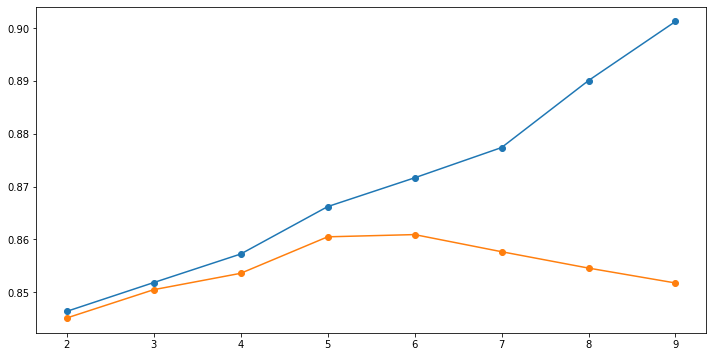

In [138]:
plt.figure(figsize=(12,6))
plt.plot(range(2, 10), train_acc, marker='o')
plt.plot(range(2, 10), test_acc, marker='o')

# hence right depth is 5

In [149]:
dt = DTC(max_depth =5,random_state=10)
dt.fit(train_x, train_y)
score_of_train = dt.score(train_x, train_y)
score_of_test = dt.score(test_x, test_y)

In [150]:
score_of_train

0.8662031382129098

In [151]:
score_of_test

0.8604847801578354

# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC()

In [153]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
rf.score(train_x, train_y)

1.0

In [145]:
rf.score(test_x, test_y)

0.8656989853438557

# checking right value of N_estimator 

In [146]:
train_acc = []
test_acc = []
for N in range(10, 101, 10):
    rf = RFC(n_estimators = N)
    dt.fit(train_x, train_y)
    train_acc.append(dt.score(train_x, train_y))
    test_acc.append(dt.score(test_x, test_y))
    

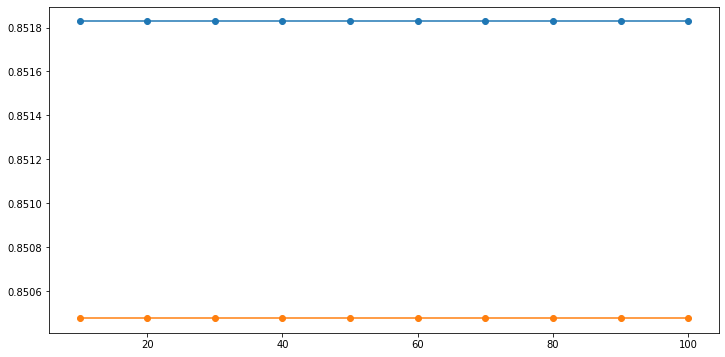

In [147]:
plt.figure(figsize=(12,6))
plt.plot(range(10, 101, 10), train_acc, marker='o')
plt.plot(range(10, 101, 10), test_acc, marker='o')

It has no effect in accuracy

# checking right value of depth

In [148]:
train_acc = []
test_acc = []
for N in range(2, 10):
    rf = RFC(max_depth = N)
    dt.fit(train_x, train_y)
    train_acc.append(dt.score(train_x, train_y))
    test_acc.append(dt.score(test_x, test_y))
    

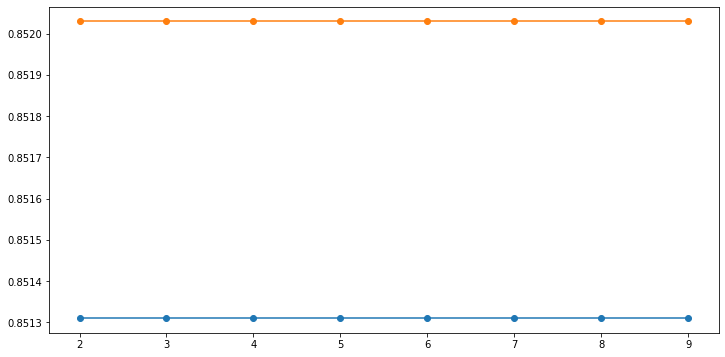

In [66]:
plt.figure(figsize=(12,6))
plt.plot(range(2, 10), train_acc, marker='o')
plt.plot(range(2, 10), test_acc, marker='o')

It has also no impact on the accuracy

# KNN algorithm

scaling the data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
x = scaler.fit_transform(x)

In [69]:
train_x,test_x, train_y, test_y = ttt(x, y, random_state=98, stratify = y)

Importing the knn model

In [70]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(KNN(n_neighbors=5), X=train_x, y=train_y, cv=10)
score

array([0.80084547, 0.80037576, 0.80225458, 0.80883044, 0.8041334 ,
       0.80084547, 0.79934211, 0.79652256, 0.80263158, 0.80357143])

# automation the process for kNN

In [73]:
def val_score(n):
    avg = []
    std = []
    for i in n:
        score = cross_val_score(KNN(n_neighbors=i), X=train_x, y=train_y, cv=10)
        avg.append(score.mean())
        std.append(score.std())
        print(score.mean())
    
    return avg, std

In [74]:
n = range(2, 50, 2)
mean, std = val_score(n)

0.8049416489791883
0.8092169935760021
0.8121296886532912
0.8136330066005784
0.814760693714088
0.8152775447896398
0.8152775006445188
0.8149485974212187
0.8154184560155672
0.8152774785719583
0.814995611974982
0.8149485974212185
0.8149486415663395
0.8151835377546732
0.8150424940933828
0.8150425161659433
0.8150895086471464
0.8153714856069249
0.8151365452734701
0.8150425823836246
0.8152775006445188
0.8151365452734701
0.8151834936095523
0.8148546345313731


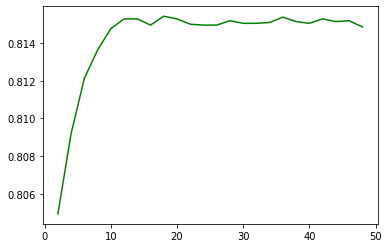

In [75]:
plt.plot(n, mean, color='green', label='mean')

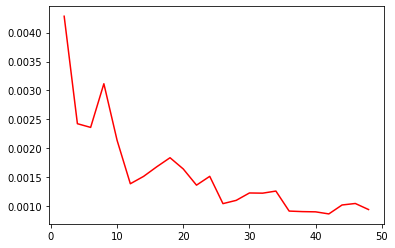

In [76]:
plt.plot(n, std , color='red', label ='deviation')


In [77]:
clf = KNN(n_neighbors =42)
clf.fit(train_x, train_y)
score1 = clf.score(train_x, train_y)
score2 = clf.score(test_x, test_y)

In [78]:
score1

0.8161232735131072

In [81]:
score2

0.8172209695603156

# ensembling the model

In [82]:
from statistics import mode

In [157]:
prediction_3 = clf.predict(test_x)

In [154]:
prediction_1 = lr.predict(test_x)
prediction_2 = dt.predict(test_x)

In [159]:
final_pred = np.array([])
for i in range(0, len(test_x)):
    final_pred = np.append(final_pred, mode([prediction_1[i], prediction_2[i],prediction_3[i]]))

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(test_y, final_pred)

0.8299041713641488

Decision tree is working well on the data